# Titanic: Machine learning from disaster- Random Forest

## I - Exploratory data analysis

* Data extraction : we'll load the dataset and have a first look at it.
* Cleaning : we'll fill in missing values.
* Plotting : we'll create some interesting charts that'll (hopefully) spot correlations and hidden insights out of the data.
* Assumptions : we'll formulate hypotheses from the charts.

1.Import Useful libraries


In [190]:

# import libraries we will use
import warnings
warnings.filterwarnings('ignore')

# matplotlib for plotting
from matplotlib import pyplot as plt
import matplotlib
# matplotlib.style.use('ggplot')
%matplotlib inline

# seaborn for plotting
# import seaborn as sns

# pandas for dataframes
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# numpy for linear algebra
import numpy as np

# sklearn for machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

ImportError: No module named 'seaborn'

Two datasets are available: a training set and a test set.

2.Loading the training set.


In [175]:
# load training set into a pandas dataframe
data = pd.read_csv('./train.csv')

In [176]:
test_data = pd.read_csv('./test.csv')

3.Show head of the dataframe

In [177]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [178]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


The Survived column is the target variable. If Suvival = 1 the passenger survived, otherwise he's dead.
The other variables that describe the passengers are:

* PassengerId: and id given to each traveler on the boat
* Pclass: the passenger class. It has three possible values: 1,2,3
* The Name
* The Sex
* The Age
* SibSp: number of siblings and spouses traveling with the passenger
* Parch: number of parents and children traveling with the passenger
* The ticket number
* The ticket Fare
* The cabin number
* The embarkation. It has three possible values S,C,Q>

4.Pandas provide Dataframe Information





In [179]:
# dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


5.Describe numerical features using the describe method.

In [180]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [181]:
342/891.0

0.3838383838383838

In [182]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [183]:
# statistical view of the numeric columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


6.Let's now make some charts.

Lets Visaualize some attribute distribution and Survival based on different attributes





In [184]:
print(data.groupby('Survived').count())

          PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived                                                                    
0                 549     549   549  549  424    549    549     549   549   
1                 342     342   342  342  290    342    342     342   342   

          Cabin  Embarked  
Survived                   
0            68       549  
1           136       340  


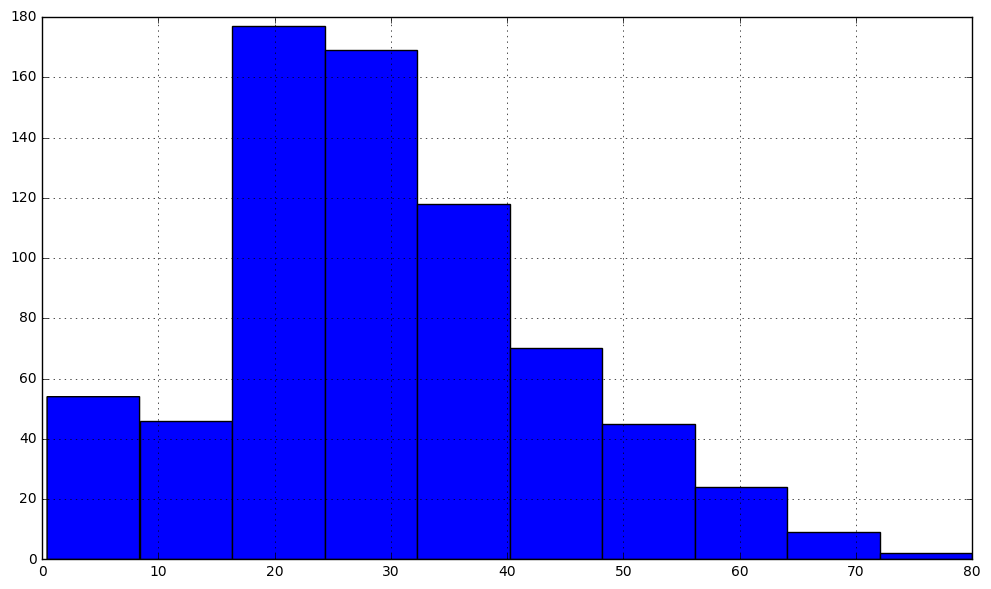

In [185]:
figure = plt.figure(figsize=(12,7))
data.Age.hist()

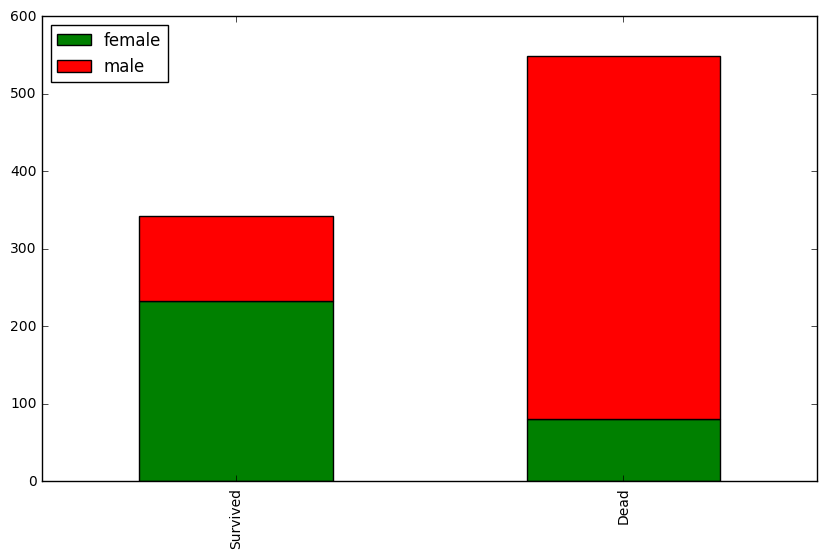

In [186]:
# correlate the survival with the Sex variable.
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,6),color = ['g','r'])

In [191]:
# data[data.Age <15].Survived.value_counts().plot(Kind='bar')

In [ ]:
data.Pclass.hist()

In [ ]:
#correlate the survival with the Pclass variable. 
plt.hist([data[data['Survived']==1]['Pclass'],data[data['Survived']==0]['Pclass']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Pclass')
plt.ylabel('Number of passengers')

In [ ]:
# combine the age, the fare and the survival on a single chart
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

In [ ]:
# ticket fare correlates with Pclass
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax = ax)

## II - Feature engineering

 we append test to train and affect the result to combined

In [ ]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('./train.csv')
    
    # reading test data
    test = pd.read_csv('./test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    
    return combined

In [ ]:
combined = get_combined_data()

In [ ]:
combined.shape


In [ ]:
combined.head()

### Processing Age

In [ ]:
# find unique values from age attribute
combined.Age.unique()

In [ ]:
# Filling the missing values with median of Age column
combined['Age'] = combined.Age.fillna(data.Age.mean())

In [ ]:
# Checking is there any more missing value present
combined.Age.unique()

### Processing Sex

In [ ]:
#function maps the string values male and female to 0 and 1 respectively.
combined.Sex =combined.Sex.map({'male':0, 'female':1}).astype(int)

In [ ]:
#checking the data description
combined.describe()

In [ ]:
combined.Sex.unique()

### Processing Fare

In [ ]:
combined.Fare.unique()

In [ ]:
combined['Fare'] = combined.Fare.fillna(data.Fare.median())

In [ ]:
combined[combined.Fare.isnull()]

In [ ]:
combined[combined.Fare==0]

In [ ]:
# combined['Fare'==0] = combined.Fare.fillna(data.Fare.median())

### Processing Pclass

In [ ]:
combined.Pclass.unique()

### Processing SibSp, Parch

In [ ]:
combined.SibSp.unique()

In [ ]:
combined.Parch.unique()

### Processing Embarked

In [ ]:
combined.Embarked.unique()

In [ ]:
#function replaces the two missing values of Embarked with the most frequent Embarked value.
print(combined.groupby('Embarked').count());

In [ ]:
combined.Embarked=combined.Embarked.fillna('S')

In [ ]:
combined.Embarked.unique()

In [ ]:
#function maps the string values S,C and Q to 2 ,0 and 1 respectively.
Ports = list(enumerate(np.unique(combined['Embarked'])))    # determine all values of Embarked,
Ports_dict = { name : i for i, name in Ports }              # set up a dictionary in the form  Ports : index
combined.Embarked = combined.Embarked.map( lambda x: Ports_dict[x]).astype(int)     # Convert all Embark strings to int


In [ ]:
combined.Embarked.unique()

### Evaluation Matrics

In [ ]:
model_data=combined.ix[0:890]
model_data['Survived']=pd.read_csv('./train.csv').Survived

In [ ]:
train, test = train_test_split(model_data, test_size = 0.2)
train.head()

In [ ]:
test.head()

In [ ]:
targets=test.Survived

In [ ]:
test.drop('Survived',1)

In [ ]:
train_features=train[['Sex', 'Age','Pclass','Fare','SibSp','Parch','Embarked']] 
train_out=train['Survived']

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf=clf.fit(train_features, train_out)

In [ ]:
test_features=test[['Sex', 'Age','Pclass','Fare','SibSp','Parch','Embarked']]

In [ ]:
Out = clf.predict(test_features)

In [ ]:
result_metric = pd.DataFrame(columns=['PassengerId', 'Survived'])
result_metric['PassengerId'] = test.PassengerId
result_metric['Survived'] = Out.astype(int)
result_metric.to_csv('randomForest.csv', index=False)
print(result_metric.head(10))

In [ ]:
print (classification_report(targets, result_metric.Survived))

In [ ]:
print(accuracy_score(targets, result_metric.Survived))

## III - Modeling

We'll be using Random Forests. Random Froests has proven a great efficiency

1.Use the train set to build a predictive model.    

2.Evaluate the model using the train set.

3.Test the model using the test set and generate and output file for the submission.

In [ ]:
targets = pd.read_csv('./train.csv').Survived
data = combined.ix[0:890]
test_data = combined.ix[891:]
    
   

In [ ]:
df_out = targets
df_features = data[['Sex', 'Age','Pclass','Fare','SibSp','Parch','Embarked']]
df_features
# df_features


In [ ]:
clf = RandomForestClassifier()

In [ ]:
df_out.shape

In [ ]:
df_features.shape

In [ ]:
clf=clf.fit(df_features, df_out)
score = clf.score(df_features, df_out)
score
# clf


In [ ]:
for header, value in zip(df_features.columns,clf.feature_importances_):
    print (header," : ", value)


In [ ]:
test_features=test_data[['Sex', 'Age','Pclass','Fare','SibSp','Parch','Embarked']]

In [ ]:
Output = clf.predict(test_features)


In [ ]:
for header, value in zip(test_features.columns,clf.feature_importances_):
    print (header," : ", value)

In [ ]:
result = pd.DataFrame(columns=['PassengerId', 'Survived'])
result['PassengerId'] = test_data.PassengerId
result['Survived'] = Output.astype(int)
result.to_csv('randomForest.csv', index=False)
# print(result)
test_data['Survived']=result['Survived']

In [ ]:
test_data.head(10)